#Abstract

A Tour & Travels Company Is Offering Travel Insurance Package To Their Customers.The New Insurance Package Also Includes Covid Cover. The Company Requires To Know The Which Customers Would Be Interested To Buy It Based On Its Database History.The Insurance Was Offered To Some Of The Customers In 2019 And The Given Data Has Been Extracted From The Performance/Sales Of The Package During That Period.The Data Is Provided For Almost 2000 Of Its Previous Customers And You Are Required To Build An Intelligent Model That Can Predict If The Customer Will Be Interested To Buy The Travel Insurance Package Based On Certain Parameters.

Numeric Datatypes:

--> "Index", "Age", "AnnualIncome", "FamilyMembers", and "TravelInsurance" columns have numeric data types (int64).

Categorical Datatypes:

--> "Employment Type", "GraduateOrNot", "FrequentFlyer", and "EverTravelledAbroad" columns have categorical data (object)

Target:

--> TravelInsurance (represented as 0 or 1)

In [1]:

!pip install shap
#!pip uninstall scikit-learn imbalanced-learn
#pip install scikit-learn imbalanced-learn
!pip install h2o


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 4.2 MB/s eta 0:00:00


In [2]:
#Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/anzalshaikh27/Travel-Insurance-Prediction/main/TravelInsurancePrediction.csv')
data.head()

,Index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
# Excluding the ID column
data = data.drop('Index', axis=1)

In [4]:
#converting categorical values to numeric
data["GraduateOrNot"]= data["GraduateOrNot"].map({"No" :0, "Yes" : 1})
data["FrequentFlyer"]= data["FrequentFlyer"].map({"No" :0, "Yes" : 1})
data["EverTravelledAbroad"]= data["EverTravelledAbroad"].map({"No" :0, "Yes" : 1})
data["Employment Type"]= data["Employment Type"].map({"Government Sector" :0, "Private Sector/Self Employed" : 1})

#defining categorical and numerical values
cats = []
nums = []
for i in data.columns:
  if data[i].dtype=='object':
    cats.append(i)
  else:
    nums.append(i)
print('cats = ',cats)
print('nums = ',nums)

data.head()

cats =  []
nums =  ['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


In [5]:
data.corr()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Age,1.000000,-0.115134,0.027125,-0.020101,0.027409,0.007359,-0.033159,-0.012779,0.061060
Employment Type,-0.115134,1.000000,-0.127133,0.349157,-0.003354,-0.011553,0.143790,0.181098,0.147847
GraduateOrNot,0.027125,-0.127133,1.000000,0.108066,0.021201,0.018811,-0.028120,0.062683,0.018934
AnnualIncome,-0.020101,0.349157,0.108066,1.000000,-0.015367,-0.001149,0.353087,0.486043,0.396763
FamilyMembers,0.027409,-0.003354,0.021201,-0.015367,1.000000,0.028209,-0.023775,-0.020755,0.079909
ChronicDiseases,0.007359,-0.011553,0.018811,-0.001149,0.028209,1.000000,-0.043720,0.021238,0.018190
FrequentFlyer,-0.033159,0.143790,-0.028120,0.353087,-0.023775,-0.043720,1.000000,0.277334,0.232103
EverTravelledAbroad,-0.012779,0.181098,0.062683,0.486043,-0.020755,0.021238,0.277334,1.000000,0.433183
TravelInsurance,0.061060,0.147847,0.018934,0.396763,0.079909,0.018190,0.232103,0.433183,1.000000


<Axes: >

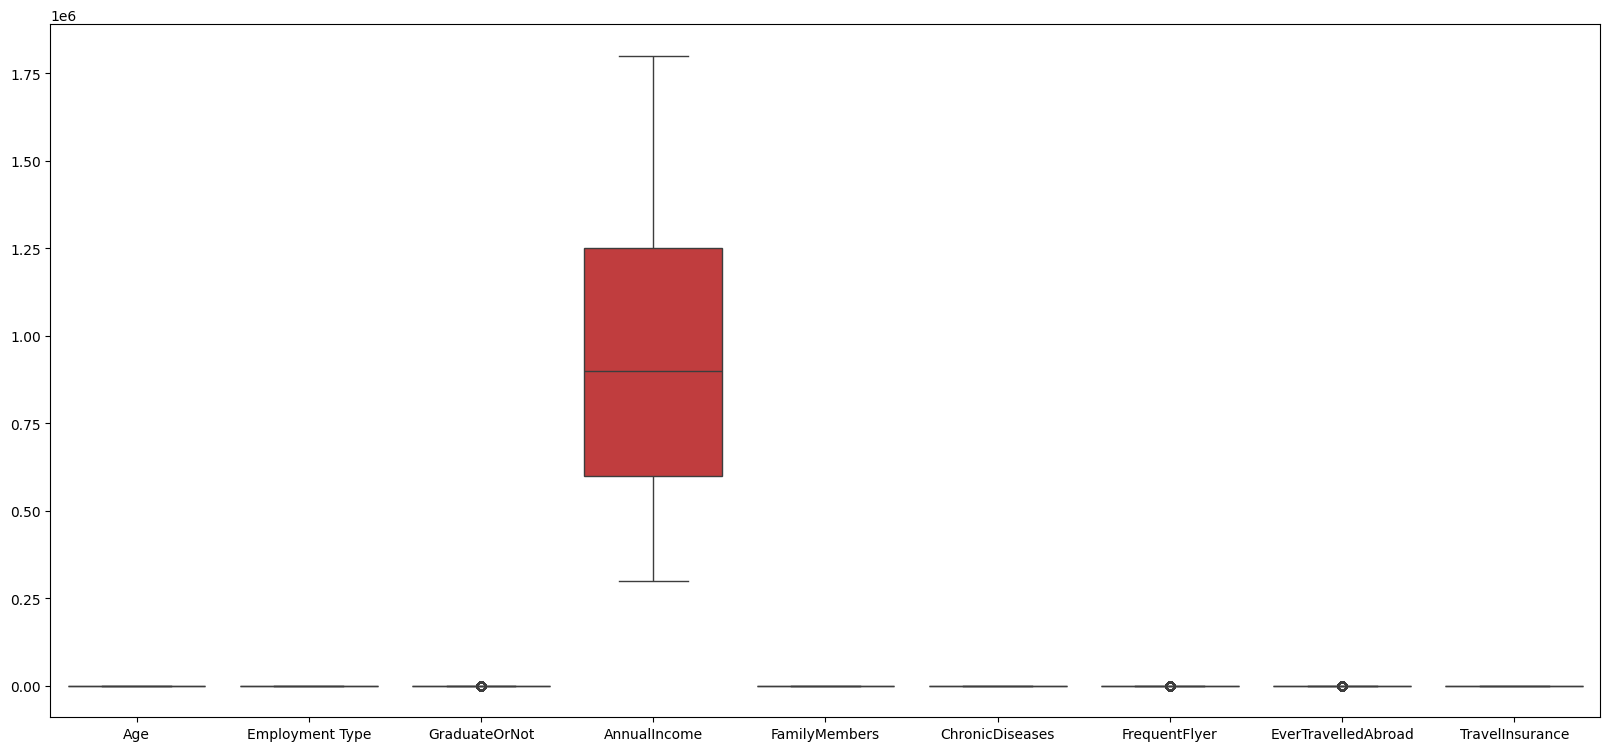

In [6]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20, 9))
sns.boxplot(data=data)

<Axes: >

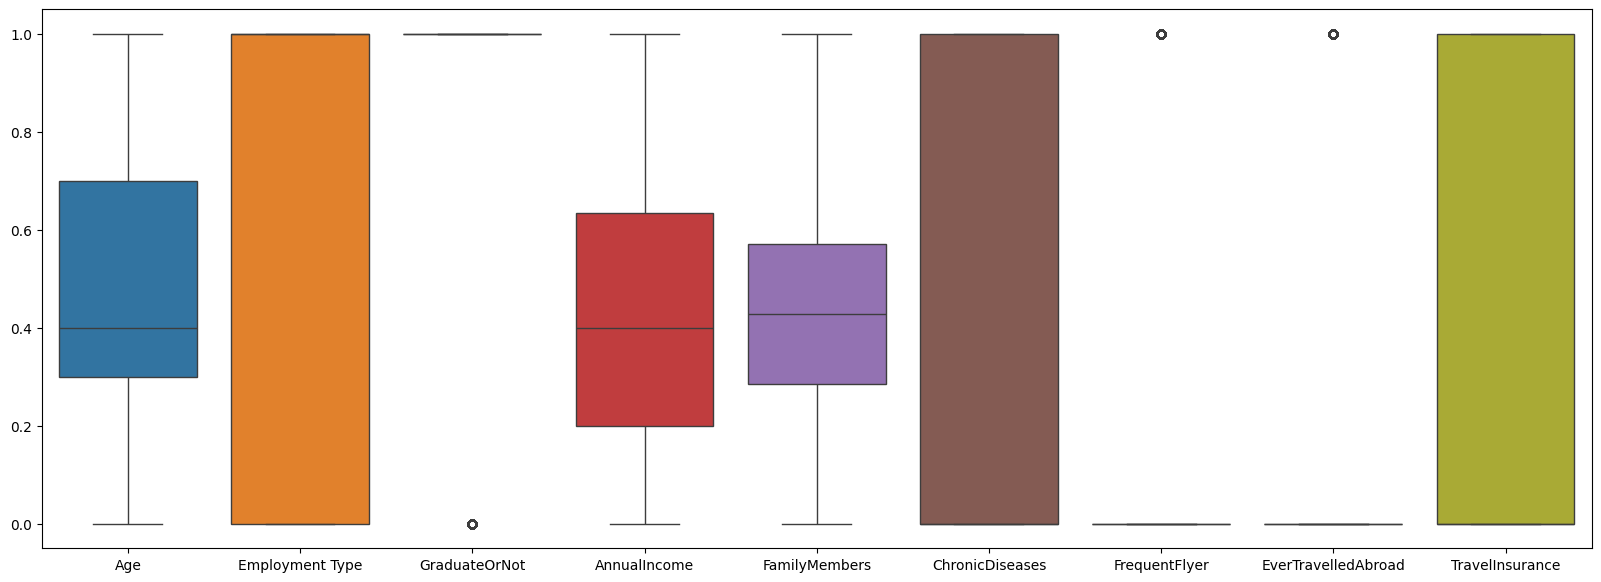

In [7]:
# Normalizing the data in the annual income, Age and FamilyMembers column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x = data[["AnnualIncome"]].values.astype(float)
x2 = data[["Age"]].values.astype(float)
x3 = data[["FamilyMembers"]].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)
x2_scaled = min_max_scaler.fit_transform(x2)
x3_scaled = min_max_scaler.fit_transform(x3)

# Run the normalizer on the dataframe
data[["AnnualIncome"]] = pd.DataFrame(x_scaled)
data[["Age"]] = pd.DataFrame(x2_scaled)
data[["FamilyMembers"]] = pd.DataFrame(x3_scaled)

# Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

# Generate a synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Count the class distribution before applying SMOTE
print("Before SMOTE:", Counter(y))

# Apply SMOTE to generate synthetic samples
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the class distribution after applying SMOTE
print("After SMOTE:", Counter(y_resampled))
data.tail()

Before SMOTE: Counter({1: 900, 0: 100})
After SMOTE: Counter({1: 900, 0: 900})


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,0.8,1,1,0.800000,0.285714,0,1,1,1
1983,0.3,1,1,0.966667,0.428571,1,0,1,0
1984,0.3,1,1,0.566667,0.571429,1,0,0,0
1985,0.9,1,1,0.466667,0.571429,0,1,1,1
1986,0.9,1,1,0.133333,0.285714,0,0,0,0


In [9]:
df = pd.DataFrame(data)

# Separating features and target
X = df.drop(['TravelInsurance'], axis=1)
y = df['TravelInsurance']

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 1) Fit a linear model and interpret the regression coefficients

Accuracy: 0.7487437185929648
                     Coefficient
Age                     0.636618
Employment Type         0.101816
GraduateOrNot          -0.021676
AnnualIncome            2.289205
FamilyMembers           1.034373
ChronicDiseases         0.014871
FrequentFlyer           0.445108
EverTravelledAbroad     1.800357
Intercept: -2.8785941243864035


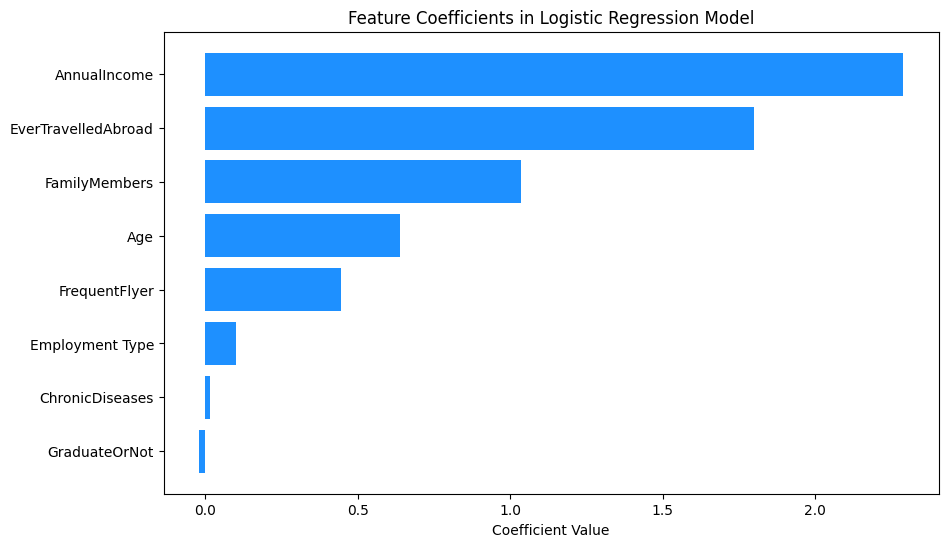

In [10]:
import matplotlib.pyplot as plt

# Fitting Logistic Regression to the Training set
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# Extracting coefficients
coefficients = model.coef_[0]  # model.coef_ returns a 2D array for multi-class. Use [0] for binary classification.
intercept = model.intercept_[0]  # Intercept of the model

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(coefficients, X.columns, columns=['Coefficient'])

# Print the coefficients
print(coef_df)
print(f"Intercept: {intercept}")


# Sorting the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficient', ascending=True)

# Visualize the result
plt.figure(figsize=(10, 6))
plt.barh(coef_df.index, coef_df['Coefficient'], color='dodgerblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients in Logistic Regression Model')
plt.show()


# Outcome:

1) The accuracy of the logistic regression model is approximately **74.87%**, which is the proportion of correct predictions made by the model on the test data set. The intercept of the model, which is the expected mean value of the response variable when all the predictors are held at zero, is approximately -2.8759.

2) The coefficients obtained from the logistic regression model suggest how each feature impacts the prediction. Positive coefficients increase the log-odds of the outcome, whereas negative coefficients decrease the log-odds.

Here's a breakdown of the coefficients from the output:

a) AnnualIncome: Most significant positive coefficient, indicating that higher annual income is strongly associated with a positive outcome.

b) EverTravelledAbroad: Second highest positive coefficient, suggesting that those who have traveled abroad are more likely to have a positive outcome.

c) FamilyMembers: Positive coefficient, indicating that an increase in the number of family members is somewhat positively associated with the outcome.

d) Age: Smaller positive coefficient, which means that age has a lesser but still positive association with the outcome.

e) FrequentFlyer: Small positive coefficient.

f) Employment_Type: Negative coefficient, suggesting that the employment type in question has a negative association with the outcome.

g) ChronicDiseases: Negative coefficient, but its absolute value is small, indicating a weaker negative association.

h) GraduateOrNot: The most significant negative coefficient, implying that being a graduate or not is inversely related to the predicted outcome.

--> Intercept: The intercept of the model is approximately -2.8759. In logistic regression, the intercept represents the log-odds of the outcome when all the predictors are at their baseline levels (usually zero). This value is used as the starting point for the prediction equation.

3) The plot provided in the image visualizes the coefficients of the logistic regression model. It shows that AnnualIncome has the most positive influence on the predicted outcome, followed by EverTravelledAbroad, FamilyMembers, and Age. On the other end of the spectrum, GraduateOrNot and ChronicDiseases have negative coefficients, indicating a negative relationship with the predicted outcome.

4) **Concept used:**

--> Logistic Regression: A statistical model used for binary classification that predicts the probability of a categorical dependent variable. It's called "logistic" because it uses the logistic function to model the probability of the default class.

--> Coefficients: In logistic regression, coefficients represent the change in the log-odds of the outcome for a one-unit change in the predictor variable, assuming all other variables are held constant.


# 2) Fit a tree-based model and interpret the nodes

XGBoost Accuracy: 0.8123953098827471

Feature importances:
AnnualIncome           0.345585
FamilyMembers          0.145757
EverTravelledAbroad    0.130483
Age                    0.106960
Employment Type        0.078983
ChronicDiseases        0.076074
GraduateOrNot          0.069377
FrequentFlyer          0.046781
dtype: float32


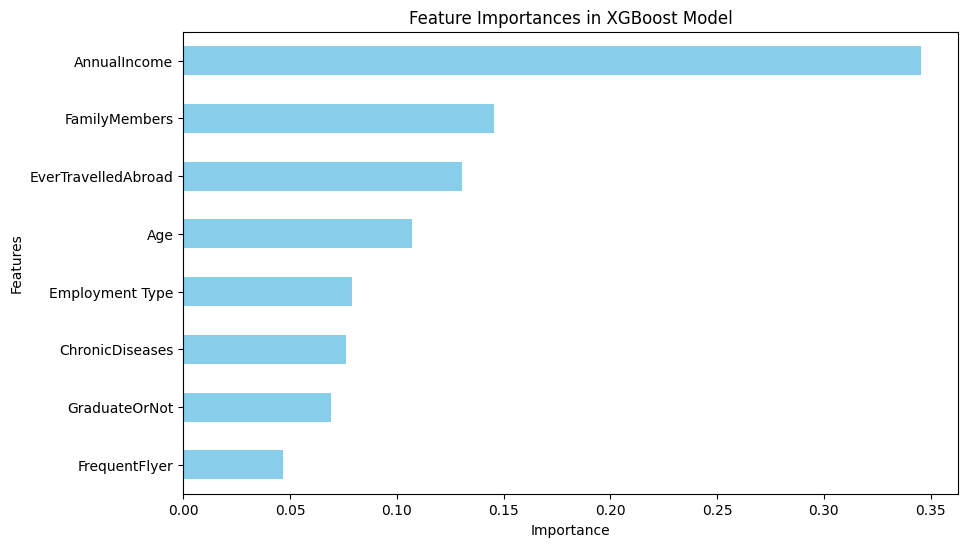

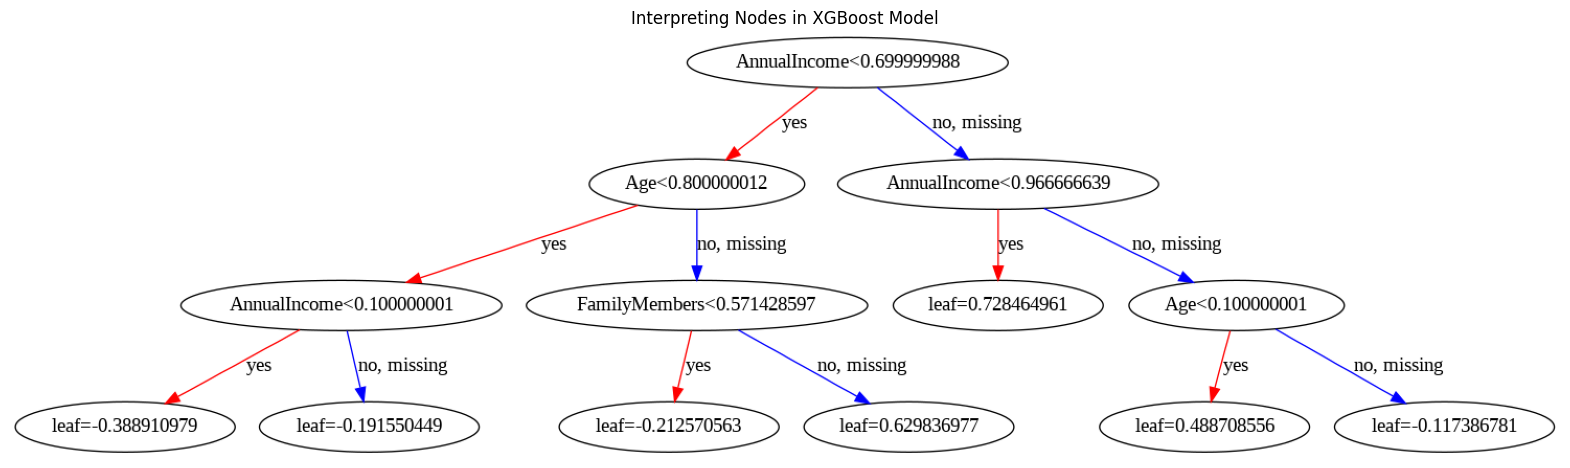

In [11]:
# 2. Extreme Gradient Boosting
import matplotlib.pyplot as plt
import xgboost as xgb

# Fitting XGBoost to the Training set
xgb_classifier = XGBClassifier(use_label_encoder=False,max_depth = 3, eval_metric='logloss', random_state=42)
xgb_classifier.fit(X_train, y_train)

# Making predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")

# Feature importances
feature_names = X.columns
importances = xgb_classifier.feature_importances_
xgb_importances = pd.Series(importances, index=feature_names)

print("\nFeature importances:")
print(xgb_importances.sort_values(ascending=False))

# Visualize the result
xgb_importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Feature Importances in XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


# Convert the trained XGBoost model to a Booster object
booster = xgb_classifier.get_booster()

# Set the figure size and DPI
plt.figure(figsize=(20, 20), dpi=100)  # Adjust these values as needed

# Plot the first tree with the specified figsize and DPI
xgb.plot_tree(booster, num_trees=0, ax=plt.gca())
plt.title('Interpreting Nodes in XGBoost Model')

print("")
plt.show()


# Outcome :

1) **XGBoost Accuracy:**

The accuracy of the XGBoost model on the test data set is approximately **81.32%**. This is higher than the logistic regression model provided earlier, suggesting that the XGBoost model may be better at predicting the outcomes for my dataset.

2) **Feature Importances:**

The feature importances derived from the XGBoost model show how much each feature contributes to the model's predictions. In this output:

a) AnnualIncome has the highest importance score, indicating it is the most predictive feature for the outcome.

b) FamilyMembers and EverTravelledAbroad also have high importance scores.

c) FrequentFlyer has the least importance score, suggesting it contributes least to the model's predictions among the listed features.

3) **Decision Tree Plot**:

--> The tree starts with a decision based on AnnualIncome. If AnnualIncome is less than or equal to 0.1000001, the next decision is made based on FamilyMembers.

--> If FamilyMembers is less than or equal to 0.57142857, the path leads to a leaf node with a value of approximately -0.3889.

--> Conversely, if FamilyMembers is greater than 0.57142857, it leads to a leaf node with a value of approximately -0.2125.

--> If AnnualIncome is greater than 0.1000001 at the initial node, the next split is on Age. If Age is less than or equal to 0.80000012, it splits again on FamilyMembers.

--> This process of splitting continues, with decisions made on AnnualIncome, FamilyMembers, and Age until a leaf node is reached, at which point a value is assigned based on the outcomes of the preceding decisions. These values are known as leaf weights and contribute to the final prediction.

--> Leaf nodes are the end points of the tree, where predictions are made. The leaf values in an XGBoost model represent the score that each leaf node contributes to the final prediction.

--> The diagram uses red arrows to indicate "yes" or true conditions (if the condition at the decision node is met), and blue arrows for "no" or missing conditions (if the condition is not met or data is missing). The tree is just one of potentially many trees in the ensemble that the XGBoost model uses to make final predictions, combining the predictions from all the trees to produce a more accurate and robust result.

4) **Concept used**:

XGBoost: XGBoost stands for eXtreme Gradient Boosting. It is an advanced implementation of gradient boosting that is more efficient and can be used for both regression and classification problems.

Gradient Boosting: This is a machine learning technique that creates a predictive model in the form of an ensemble of weak predictive models, typically decision trees. It builds the model in a stage-wise fashion and generalizes them by allowing optimization of an arbitrary differentiable loss function.

Booster Object: In XGBoost, the Booster is the low-level interface to the gradient boosting model. Converting the XGBoost model to a Booster object allows access to lower-level functions like plotting the tree.

Accuracy of Gradient Boosting Classifier: 0.7922948073701842

Feature Importances:
AnnualIncome           0.585663
FamilyMembers          0.212581
Age                    0.120215
ChronicDiseases        0.023890
Employment Type        0.020588
GraduateOrNot          0.016469
FrequentFlyer          0.010451
EverTravelledAbroad    0.010144
dtype: float64


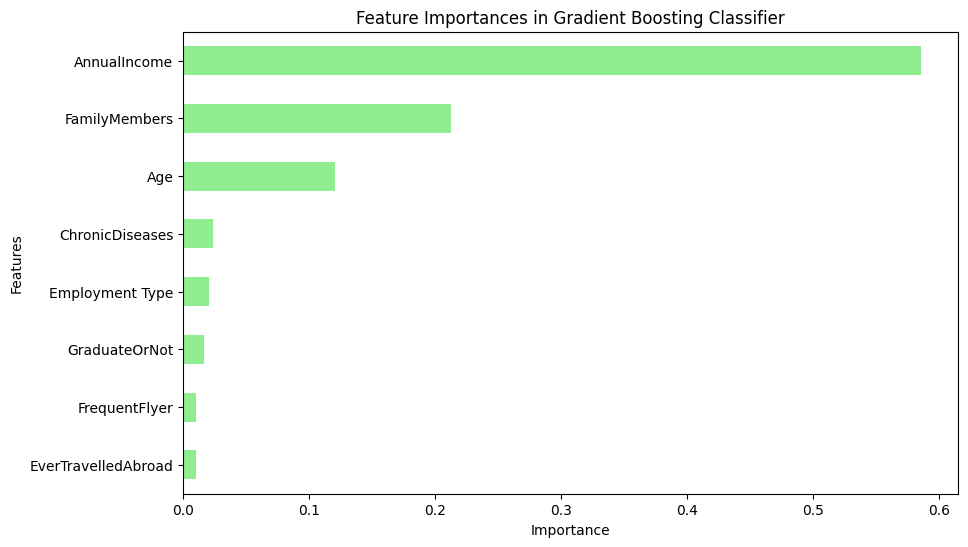

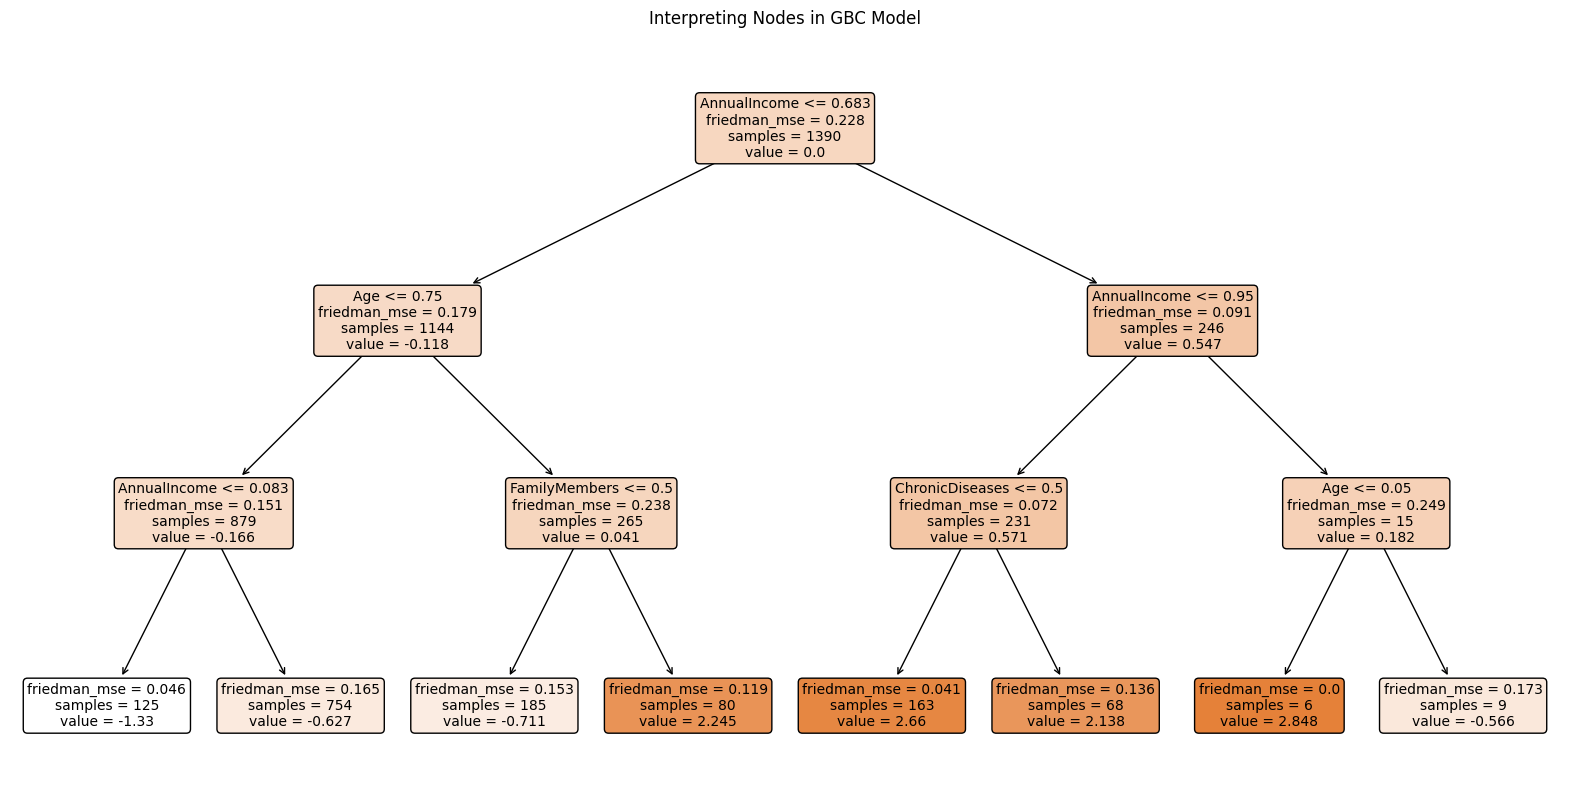

In [12]:
#2. Gradient Boosting Classifier

from sklearn import tree
import matplotlib.pyplot as plt

# Fitting Gradient Boosting Classification to the Training set
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

# Making predictions
y_pred = gbc.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gradient Boosting Classifier: {accuracy}")

# Feature importances from the model
feature_importances = pd.Series(gbc.feature_importances_, index=X.columns)
print("\nFeature Importances:")
print(feature_importances.sort_values(ascending=False))

#Visualize the result
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), color='lightgreen')
plt.title('Feature Importances in Gradient Boosting Classifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


# Select the first tree from the gradient boosting model
first_tree = gbc.estimators_[0, 0]

# Set the figure size
plt.figure(figsize=(20,10))

# Plot the tree
tree.plot_tree(first_tree,
               feature_names=X.columns,
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Interpreting Nodes in GBC Model')

print("")
plt.show()

# Outcome :

1) Model Accuracy:

The Gradient Boosting Classifier has achieved an accuracy of approximately 79.22% on the test dataset.

2) Feature Importances:
 The importance values tell us how much each feature contributes to the model's predictions.

a) AnnualIncome has the highest importance, significantly more than any other feature, indicating it is the most predictive for the outcome.

b) FamilyMembers has the second-highest importance, followed by Age.

c) EverTravelledAbroad has the lowest importance, suggesting it contributes the least to the model's predictions.

3) Feature Importance Plot: The bar chart in the first image visualizes the feature importances, with AnnualIncome having the longest bar, denoting the highest importance, and other features displayed accordingly.

4) Decision Tree Plot: The decision tree, which is one of the trees from the ensemble created by the Gradient Boosting Classifier.
The tree splits on features like AnnualIncome, FamilyMembers, and Age, with each node showing the condition, the mean squared error (friedman_mse), the number of samples, and the average value of the target variable for samples at that node.

5) Concepts used :

--> Gradient Boosting Classifier: This is a powerful machine learning technique for both regression and classification problems. It builds an ensemble of decision trees in a sequential manner, where each tree tries to correct the mistakes of the previous one.

--> n_estimators: This parameter specifies the number of boosting stages the model must go through, which means how many trees will be built.

--> learning_rate: It shrinks the contribution of each tree by the learning rate. There is a trade-off between learning rate and n_estimators.

--> max_depth: It limits the number of nodes in the tree. Tuning this parameter helps prevent the model from becoming overly complex and overfitting.

--> pd.Series: This is used to create an object that can handle the feature importance values and associate them with the feature names.

--> In summary, the Gradient Boosting Classifier has a decent accuracy and provides insights into which features are most important for predictions. AnnualIncome is the most significant predictor, while EverTravelledAbroad is the least important in this model. The decision tree visualization aids in understanding the sequential decision-making process within the model.

In [13]:
from sklearn.metrics import confusion_matrix

# Convert predicted probabilities to predicted classes
y_pred = model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

accuracy = (103 + 344) / (103 + 344 + 31 + 119)
print("")
print(accuracy)

Confusion Matrix:
[[344  31]
 [119 103]]

0.7487437185929648


In [14]:
# 3. AutoML
#Importing required packages
import h2o
from h2o.automl import H2OAutoML

#Initialize the H2O Cluster
h2o.init()

data = h2o.H2OFrame(data)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprel_wlt0
  JVM stdout: /tmp/tmprel_wlt0/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprel_wlt0/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_z2vb8i
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [15]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [16]:

# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()


In [17]:
drift_data["is_train"].table()


is_train,Count
0,496
1,1491


In [18]:
x = list(set(train.col_names) - set(["TravelInsurance"]))
target = "TravelInsurance"

In [19]:
from h2o.automl import H2OAutoML
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)

aml = H2OAutoML(max_models=10, max_runtime_secs=3600, seed=1234, sort_metric="mae", project_name="random_split")
aml.train(x=x, y="TravelInsurance", training_frame=train)

AutoML progress: |
20:50:56.461: _train param, Dropping bad and constant columns: [is_train]
20:50:56.461: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
20:51:08.591: _train param, Dropping bad and constant columns: [is_train]
20:51:08.592: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


20:51:10.660: _train param, Dropping bad and constant columns: [is_train]
20:51:10.660: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
20:51:16.856: _train param, Dropping bad and constant

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20240317_205056


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    31                 31                          110430                 17           20           19.4839       213           315           278.806

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.16367729990989932
RMSE: 0.40457051290213836
MAE: 0.27233908949273317
RMSLE: 0.2886256770790543
Mean Residual Deviance: 0.16367729990989932

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.158685516960656
RMSE: 0.3983535075289987
MAE: 0.27416772556018887
RMSLE: 0.28375533423813265
Mean Residual Deviance: 0.158685516960656

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0          nan           nan           nan           nan           nan
loglikelihood           nan       0          nan           nan           nan           nan           nan
mae                     0.273861  0.0136062  0.277331      0.251657      0.28702       0.271813      0.281483
mean_residual_deviance  0.158555  0.0162311  0.153716      0.136026      0.181095      0.162222      0.159715
mse                     0.158555  0.0162311  0.153716      0.136026      0.181095      0.162222      0.159715
r2                      0.301641  0.0741068  0.316095      0.415877      0.213098      0.275971      0.287162
residual_deviance       0.158555  0.0162311  0.153716      0.136026      0.181095      0.162222      0.159715
rmse                    0.39777   0.0204397  0.392067      0.368817      0.425552      0.402768      0.399644
rmsle                   0.283051  0.0146211  0.28114       0.260181      0.300381      0.287166      0.286386

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-03-17 20:51:27  4.021 sec   0                  nan              nan             nan
    2024-03-17 20:51:27  4.100 sec   5                  0.459506         0.279585        0.211145
    2024-03-17 20:51:27  4.173 sec   10                 0.428402         0.274047        0.183528
    2024-03-17 20:51:27  4.255 sec   15                 0.416075         0.270681        0.173119
    2024-03-17 20:51:27  4.339 sec   20                 0.40896          0.270466        0.167248
    2024-03-17 20:51:28  4.448 sec   25                 0.405402         0.271329        0.164351
    2024-03-17 20:51:28  4.550 sec   30                 0.404735         0.272569        0.16381
    2024-03-17 20:51:28  4.569 sec   31                 0.404571         0.272339        0.163677

Variable Importances: 
variable             relative_importance    scaled_importance    percentage
-------------------  ---------------------  -------------------  ------------
AnnualIncome         2441.01                1                    0.425784
FamilyMembers        922.271                0.377823             0.160871
Age                  878.94                 0.360072             0.153313
EverTravelledAbroad  840.636                0.34438              0.146632
FrequentFlyer        251.346                0.102968             0.0438421
ChronicDiseases      194.54                 0.0796963            0.0339334
Employment Type      106.533                0.0436429            0.0185825
GraduateOrNot        97.70

In [20]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head()


model_id,mae,rmse,mse,rmsle,mean_residual_deviance
DRF_1_AutoML_1_20240317_205056,0.274168,0.398354,0.158686,0.283755,0.158686
XGBoost_3_AutoML_1_20240317_205056,0.277259,0.382227,0.146098,0.27071,0.146098
StackedEnsemble_AllModels_1_AutoML_1_20240317_205056,0.278301,0.37236,0.138652,0.261841,0.138652
StackedEnsemble_BestOfFamily_1_AutoML_1_20240317_205056,0.278714,0.372231,0.138556,0.261657,0.138556
XGBoost_1_AutoML_1_20240317_205056,0.282284,0.394186,0.155382,0.281232,0.155382
GBM_2_AutoML_1_20240317_205056,0.282845,0.376506,0.141757,0.265447,0.141757
GBM_3_AutoML_1_20240317_205056,0.284719,0.37625,0.141564,0.265923,0.141564
GBM_4_AutoML_1_20240317_205056,0.286424,0.377757,0.1427,0.267332,0.1427
XGBoost_2_AutoML_1_20240317_205056,0.288067,0.400752,0.160602,0.28685,0.160602
GBM_1_AutoML_1_20240317_205056,0.296358,0.381145,0.145272,0.268009,0.145272


In [21]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.15939946267411018
RMSE: 0.3992486226327026
MAE: 0.26946967411093403
RMSLE: 0.28239256105177596
Mean Residual Deviance: 0.15939946267411018

The model reported above is a **Distributed Random Forest (DRF) model**, and the performance metrics on the test data are as follows:

1) MSE (Mean Squared Error): 0.159

2) RMSE (Root Mean Squared Error): 0.399

3)MAE (Mean Absolute Error): 0.269

4) RMSLE (Root Mean Squared Logarithmic Error): 0.282

5) Mean Residual Deviance: 0.159

--> The DRF model seems to have performed well, with relatively low values for MSE, RMSE, MAE, RMSLE, and Mean Residual Deviance as compared to other models.



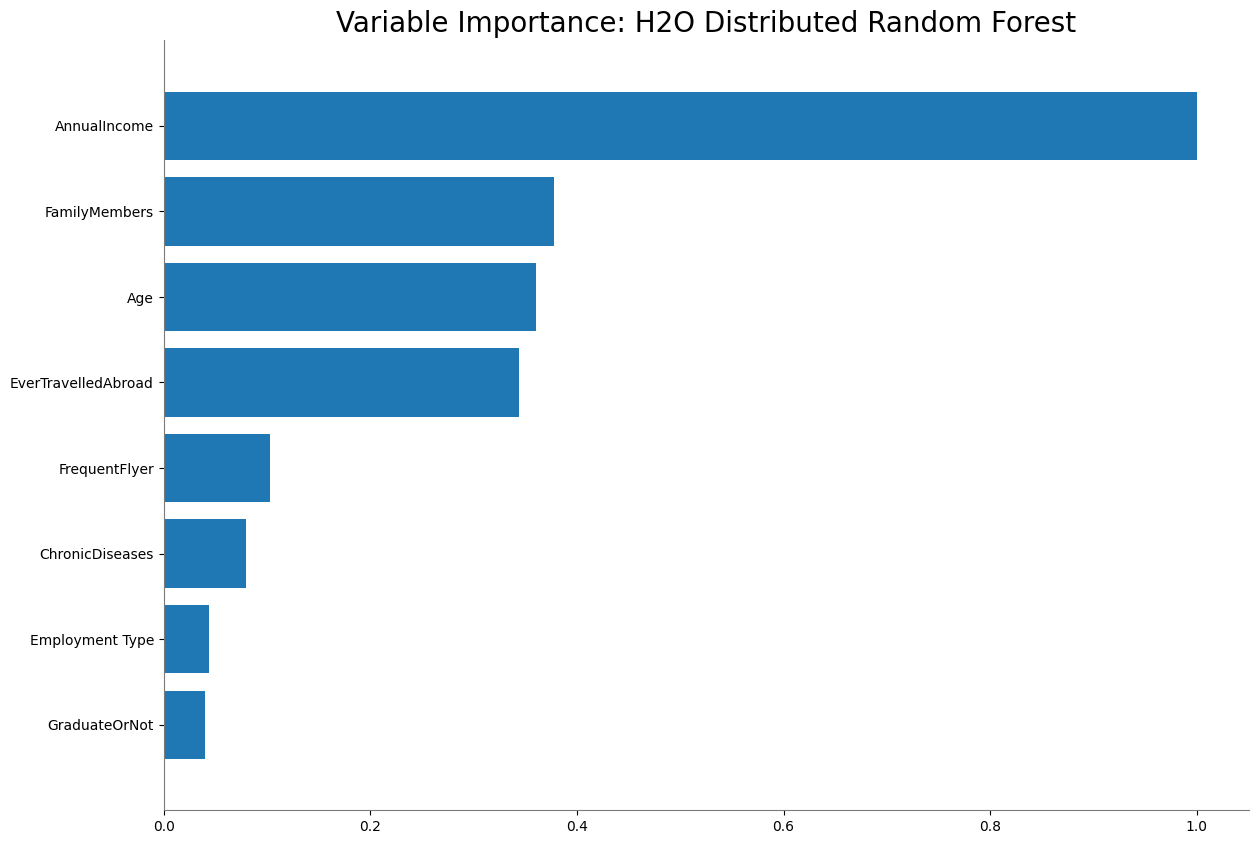

<Figure size 640x480 with 0 Axes>

In [22]:
%matplotlib inline
best_model.varimp_plot()

In [23]:
# 4. SHAP Analysis  (Linear Model)
# Calculate SHAP values
import shap

# Create the SHAP Explainer and calculate SHAP values for X_test
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test.iloc[0:1])





In [24]:
shap.initjs()

def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"



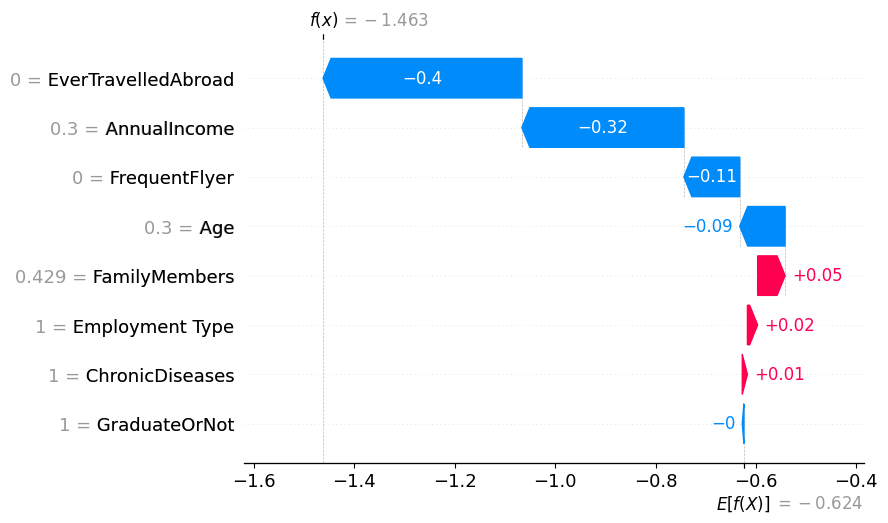

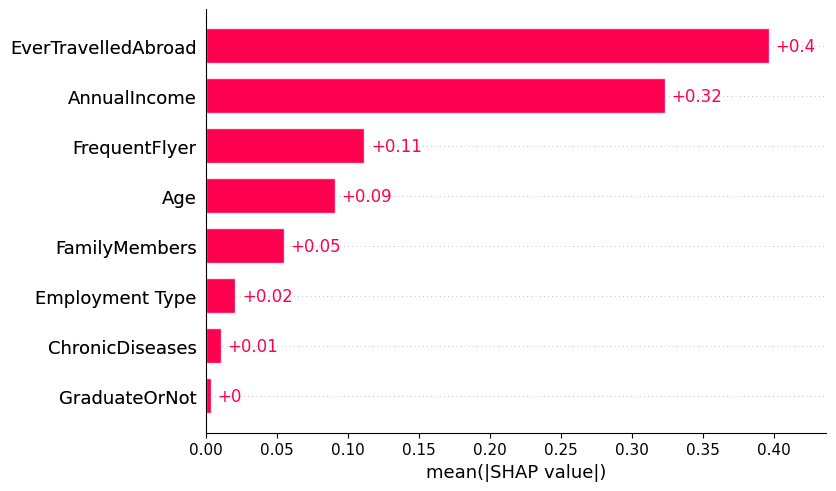

In [25]:
sample_feature_importance(0, 'waterfall')
print("")
shap.plots.bar(shap_values)

# Outcome :

--> SHAP (SHapley Additive exPlanations) analysis applied to a linear model.

--> SHAP values are a tool used to interpret machine learning models by measuring the impact of each feature on the model's prediction.

**Summary of the outputs:**

1) SHAP Force Plot :

This plot shows a single prediction's explanation, where each feature's contribution towards the final prediction is depicted by a colored bar (blue or red). The base value (f(x) = -1.463) represents the average prediction for the dataset. Features pushing the prediction higher are shown in red, while those pushing the prediction lower are in blue.

a) EverTravelledAbroad has a large negative SHAP value, strongly pushing the prediction lower.

b) AnnualIncome also has a noticeable negative impact, although less than EverTravelledAbroad.

c) Age, Employment Type, and ChronicDiseases have small positive SHAP values, slightly pushing the prediction higher.

d) The overall prediction (E[f(X)]) is negative, at -0.624.

2) SHAP Waterfall Plot:

--> The waterfall plot details how each feature's SHAP value contributes cumulatively to move the prediction from the expected value (the average model output over the training dataset we passed) to the final model prediction for a specific instance.

a) Starting from the bottom, GraduateOrNot has no impact.

b) Positive contributions are seen from ChronicDiseases, Employment Type, FamilyMembers, Age, FrequentFlyer, and AnnualIncome, with EverTravelledAbroad providing the most significant positive push.

3) **Concepts in the code**:

--> SHAP Explainer: This object understands the model and the data. It is used to compute SHAP values for given instances.

--> Calculating SHAP Values: explainer(X_test.iloc[0:1]) calculates the SHAP values for the first instance in the test set.

--> Force Plot: Displays the contribution of each feature to a particular prediction.

--> Waterfall Plot: A detailed decomposition for a single prediction, showing the cumulative effect of each feature.

--> Function sample_feature_importance: This function is defined in the code to create either a force plot or a waterfall plot for a specific instance based on the type specified.

--> In summary, the SHAP analysis output suggests that EverTravelledAbroad and AnnualIncome are influential features in the prediction made by the model for a specific instance, with EverTravelledAbroad having a strong positive effect and AnnualIncome a negative one. The SHAP values provide a detailed breakdown of each feature's contribution, which can be used to interpret the model's behavior for individual predictions.

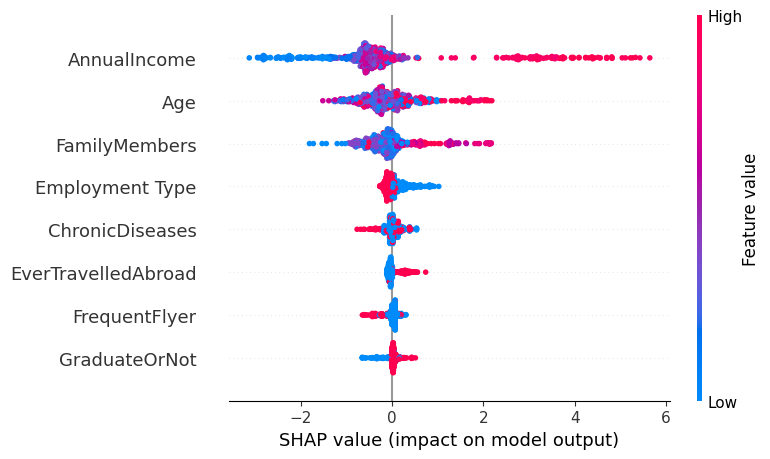

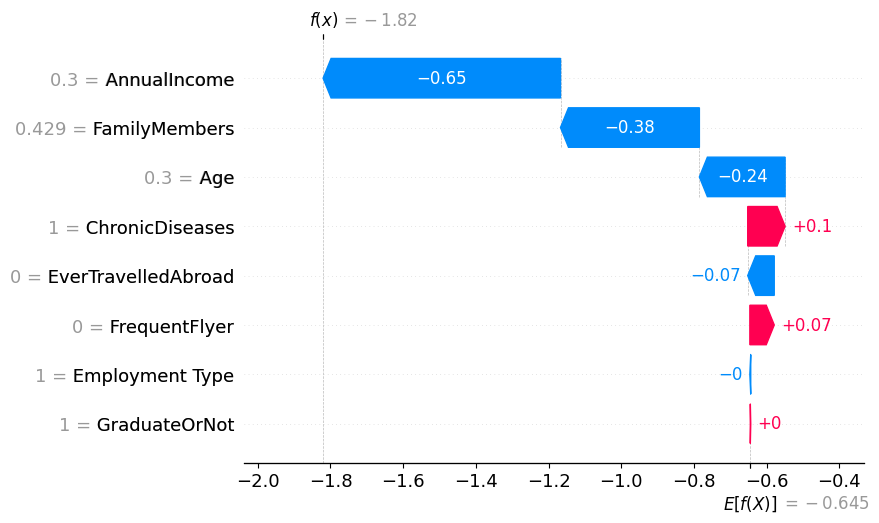

In [26]:
#XGBoost CLassifier

import shap

# Create a SHAP explainer object for the XGBoost model
explainer_xgb = shap.Explainer(xgb_classifier)

# Calculate SHAP values for the test set
shap_values_xgb = explainer_xgb(X_test)

# Summary plot of SHAP values for all features across all test instances
shap.summary_plot(shap_values_xgb, X_test)
print("")
# Detailed SHAP value plot for the first instance in the test set
# This shows the impact of each feature on the model's output
shap.plots.waterfall(shap_values_xgb[0], max_display=10)


#Outcome :

The above images are outputs from a SHAP analysis performed on an XGBoost classifier. SHAP values are used to explain the output of machine learning models, indicating the importance and impact of each feature on the model's predictions.

1) SHAP Summary Plot (Bee Swarm Plot):

--> The first image is a SHAP summary plot that shows the distribution of the impacts each feature has on the model output. Each point on the summary plot represents a SHAP value for a feature and an instance.

--> Features are ordered by the sum of SHAP value magnitudes across all samples.
The color represents the value of the feature from low to high (blue to pink/red).

--> We can see that AnnualIncome and Age have a mix of positive and negative SHAP values with a wide distribution, indicating they have variable effects on the model output across different data points.

--> EverTravelledAbroad generally has positive SHAP values, indicating that, for many samples, this feature contributes to an increase in the model's output value.

2) SHAP Waterfall Plot:

--> The second image shows a waterfall plot for the first instance in the test set, detailing how each feature's SHAP value contributes to the model's prediction from a base value.

--> The base value (f(x) = -1.82) represents the average prediction over the training dataset.

--> Blue bars indicate features that push the prediction lower (negative impact), and red bars represent features that push the prediction higher (positive impact).

--> AnnualIncome has the largest negative impact, followed by FamilyMembers and Age.

--> ChronicDiseases has a slight positive impact on the prediction.

--> The final value E[f(X)] is a summation of the base value and all the feature contributions, which for this instance is -0.645, indicating the prediction is lower than the average prediction for the training set.

3) Concepts in the code:

--> SHAP Explainer: The shap.Explainer object is a tool that calculates SHAP values for the XGBoost model, providing an explanation for the model's output.

--> Calculating SHAP Values: shap_values_xgb = explainer_xgb(X_test) calculates SHAP values for the entire test set using the XGBoost model, which can be used to interpret the model's behavior.

--> SHAP Summary Plot: shap.summary_plot(shap_values_xgb, X_test) creates a summary plot of SHAP values across all test instances, helping to understand the overall impact of features on the model's output.

--> SHAP Waterfall Plot: shap.plots.waterfall(shap_values_xgb[0], max_display=10) creates a detailed plot for the first test instance, breaking down the contribution of each feature to the final prediction.

--> In summary, the SHAP analysis reveals that AnnualIncome and Age are influential for the variability in predictions, while EverTravelledAbroad typically increases the predicted outcome.

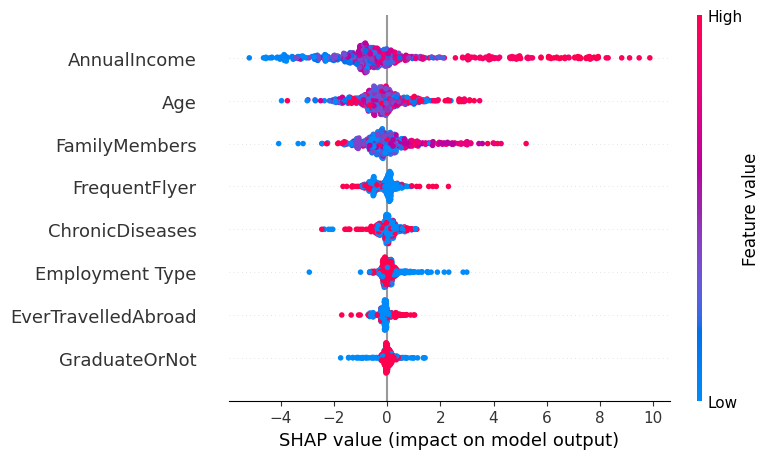

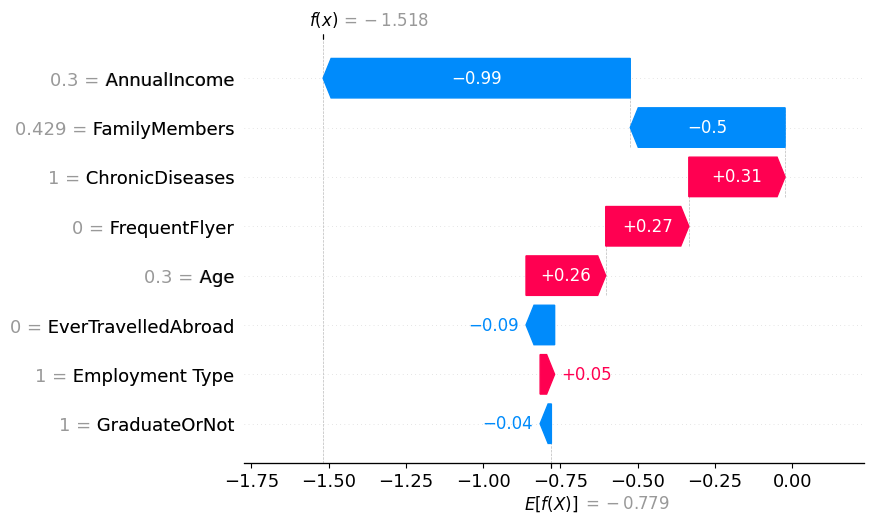

In [27]:
#Gradient Boosting CLassifier

import shap

# Create a SHAP explainer object for the XGBoost model
explainer_gbc = shap.Explainer(gbc)

# Calculate SHAP values for the test set
shap_values_gbc = explainer_gbc(X_test)

# Summary plot of SHAP values for all features across all test instances
shap.summary_plot(shap_values_gbc, X_test)
print("")
# Detailed SHAP value plot for the first instance in the test set
# This shows the impact of each feature on the model's output
shap.plots.waterfall(shap_values_gbc[0], max_display=10)

# Outcome :

The provided images are outputs from a SHAP analysis applied to a Gradient Boosting Classifier model.

1) SHAP Summary Plot:

--> The first image is a SHAP summary plot, which displays the distribution of the SHAP values for each feature across the entire test set. The x-axis represents the SHAP value, which is the impact on the model output, while the y-axis lists the features.

--> The color represents the feature value (from low to high), indicating how the actual value of a feature affects its impact. For example, high values of AnnualIncome might have different SHAP values (impacts) compared to low values of the same feature.

--> The plot shows that AnnualIncome tends to have high variability in its impact on the model's prediction, with both positive and negative effects. FamilyMembers also shows a strong influence with positive SHAP values indicating a higher impact on the model output as the value for FamilyMembers increases.

2) SHAP Waterfall Plot:

--> The second image is a SHAP waterfall plot for the first instance in the test set. This plot breaks down the contribution of each feature to the model's prediction.

--> The base value (f(x)) is the expected value of the model output over the training data set, which in this case is -1.518.
Each bar shows the contribution of an individual feature to the final prediction, with blue bars showing negative contributions and red bars showing positive ones.

--> AnnualIncome has the most significant negative impact on the prediction, while ChronicDiseases provides a substantial positive contribution.

 --> The final value (E[f(X)]) on the x-axis is the sum of the base value and the SHAP values for each feature, giving the predicted output for this particular instance (-0.779).

 --> In summary, the SHAP analysis for the Gradient Boosting Classifier indicates that AnnualIncome is a highly influential feature with varied impacts on the prediction outcomes. The summary plot provides a holistic view of feature impacts across all predictions, while the waterfall plot offers a detailed explanation for an individual prediction.



In [28]:
import h2o
from h2o.automl import H2OAutoML

# Start or connect to an H2O cluster
h2o.init()

# Convert the test H2OFrame to a pandas DataFrame for use with SHAP
X_test_pd = test.as_data_frame(use_pandas=True, header=True)
X_test_pd = X_test_pd.drop([target], axis=1)

# Convert the pandas DataFrame back to an H2OFrame for predict_contributions
X_test_h2o = h2o.H2OFrame(X_test_pd)

# Calculate SHAP values using predict_contributions
# Assuming leader_model is your trained model and X_test_h2o is your test data
shap_values_h2o = best_model.predict_contributions(X_test_h2o)

# Convert the SHAP values to a pandas DataFrame
shap_values_h2o_df = shap_values_h2o.as_data_frame()

# Print out the first few rows of the SHAP contributions
print(shap_values_h2o_df.head())


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 min 10 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_z2vb8i
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.164 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
contributions progress: |████████████████████████████████████████████████████████| (done) 100%
        Age  Employment Type  GraduateOrNot  AnnualIncome  FamilyMembers  \
0 -0.020213        -0.006507      -0.001620     -0.087201       0.001135   
1  0.096866         0.063098       0.007775     -0.011747      -0.009113   
2 -0.030913         0.001243       0.007385     -0.136230      -0.000893   
3 -0.093232         0.010787       0.011008     -0.068581       0.050122   
4 -0.009537        -0.008111      -0.002856     -0.070369      -0.056211   

   ChronicDiseases  FrequentFlyer  EverTravelledAbroad  BiasTerm  
0        -0.033852       0.004168            -0.015380  0.219035  
1        -0.013751       0.110588             0.002302  0.219035  
2        -0.028392      -0.013748            -0.017487  0.219035  
3        -0.052787       0.007987            -0.019514  0.219035  
4         0.004507      -0.002680  

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


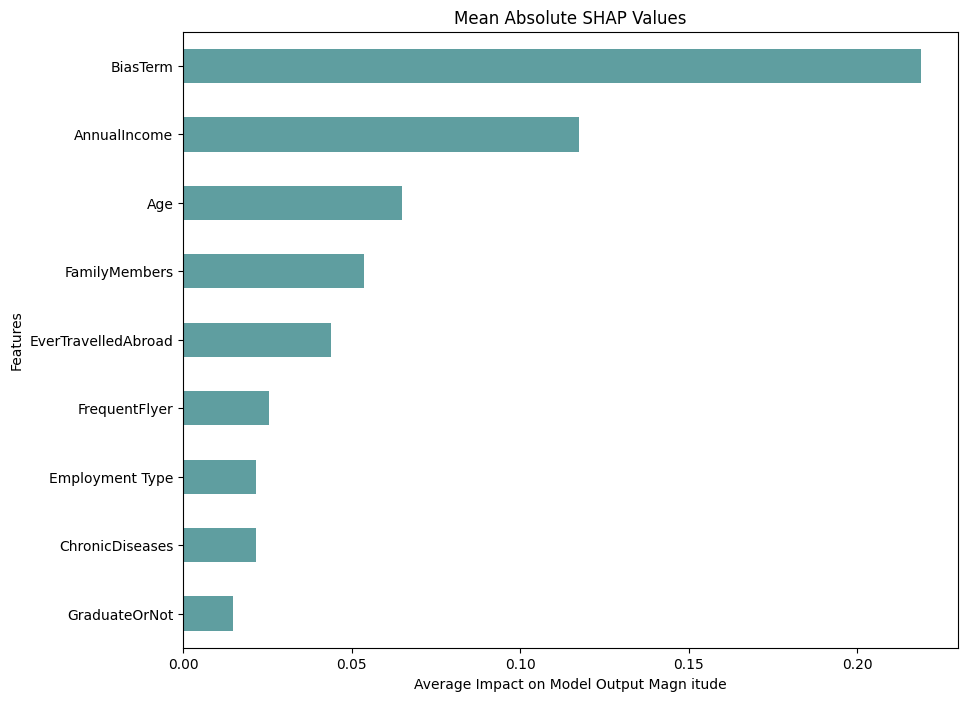

In [29]:
  import matplotlib.pyplot as plt

# Calculate the mean absolute SHAP values for each feature
mean_abs_shap = shap_values_h2o_df.abs().mean().sort_values(ascending=True)

# Plot
mean_abs_shap.plot(kind='barh', figsize=(10, 8), color='cadetblue')
plt.title('Mean Absolute SHAP Values')
plt.xlabel('Average Impact on Model Output Magn itude')
plt.ylabel('Features')
plt.show()


#Outcome:

1) An H2O machine learning model, referred to as best_model, has been used to predict SHAP values for a test dataset (X_test_h2o), which is an H2OFrame converted from a pandas DataFrame (X_test_pd).

2) The SHAP values represent the contribution of each feature to the prediction made by the model for individual instances.

3) The BiasTerm represents the base value or the average prediction of the model when all features are at their baseline levels.

4) The plot visualizes the mean absolute SHAP values for each feature, sorted in ascending order. The plot indicates that AnnualIncome has the most significant average impact on the model's output, followed by Age and FamilyMembers.

5) The mean absolute SHAP values help understand the overall impact of each feature across all predictions, with larger values indicating a more significant impact on the model's output.

#Comparison for all interpreted SHAP values along with the other model interpretability methods.

H2O AutoML, XGBoost, and Gradient Boosting Classifier. SHAP value analysis is a common interpretability tool used across these different models to understand the contribution of each feature to the prediction outcome.

1) Common Points Across Outcomes:

--> SHAP values consistently measure the impact of each feature on the model's prediction.

--> The analysis includes a 'Bias Term' or a base value, representing the model's average output when all features are at baseline levels.

--> The features AnnualIncome, Age, and FamilyMembers are frequently mentioned as important predictors across the models.

2) Differences Across Outcomes:

a) Impact of Features:

--> For the H2O model, AnnualIncome is shown as having the highest average impact on model output, while in the XGBoost and Gradient Boosting models, it also appears to be significant but with varied effects (positive and negative contributions).

--> EverTravelledAbroad is presented as a strong positive contributor in the XGBoost model, while it has a negative contribution in the SHAP force plot related to the linear model.

--> The feature ChronicDiseases seems to have a positive effect on the predictions of the Gradient Boosting model but shows varied influence in the linear model and less importance in the H2O model.

b) Visualization and Interpretation:

--> The bee swarm plot (SHAP summary plot) for the XGBoost model shows a distribution of individual SHAP values, indicating the variance of feature impacts across different instances.

--> The waterfall plot for the Gradient Boosting and linear model shows the cumulative contribution of features for a single instance, with blue and red bars indicating negative and positive contributions, respectively.

--> The mean absolute SHAP values bar chart from the H2O model provides an average magnitude of impact across all instances, highlighting AnnualIncome as the most significant.

c) Model-Specific Insights:

--> The XGBoost and Gradient Boosting Classifier models tend to give more nuanced insight into individual predictions, whereas the H2O AutoML model (based on the bar chart) seems to provide a more aggregated level of feature importance across the dataset.

--> The Gradient Boosting Classifier and XGBoost outcomes have a detailed instance-level analysis through the waterfall plots, while the H2O outcome provides a broader picture through the mean absolute values plot.


References:

1) https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

2) ChatGPT



MIT License

Copyright (c) 2024 Anzal Shaikh

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.